In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from statsmodels.api import Logit
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('C:/Users/Abdilfatah/Desktop/Data/week6/data.xlsx')

In [3]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
total_transaction_amount = df.groupby('CustomerId')['Amount'].sum()
average_transaction_amount = df.groupby('CustomerId')['Amount'].mean()
transaction_count = df.groupby('CustomerId')['TransactionId'].count()
std_transaction_amounts = df.groupby('CustomerId')['Amount'].std()

In [5]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDay'] = df['TransactionStartTime'].dt.day
df['TransactionMonth'] = df['TransactionStartTime'].dt.month
df['TransactionYear'] = df['TransactionStartTime'].dt.year

In [6]:
# the categorical columns to be one-hot encoded
categorical_columns = ['CurrencyCode', 'ProductCategory']

# Create a OneHotEncoder object
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap

# Fit and transform the data
one_hot_encoded = one_hot_encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the one-hot encoded data
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded columns back to the original DataFrame
df = pd.concat([df.drop(columns=categorical_columns), one_hot_encoded_df], axis=1)

# Display the DataFrame with one-hot encoded columns
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,...,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,256,ProviderId_6,ProductId_10,ChannelId_3,1000.0,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,256,ProviderId_4,ProductId_6,ChannelId_2,-20.0,...,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,256,ProviderId_6,ProductId_1,ChannelId_3,500.0,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,256,ProviderId_1,ProductId_21,ChannelId_3,20000.0,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,256,ProviderId_4,ProductId_6,ChannelId_2,-644.0,...,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Identify the numerical columns to be normalized
numerical_columns = ['Amount', 'Value']

# Create a MinMaxScaler object
min_max_scaler = MinMaxScaler()

# Fit and transform the data
df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])


In [8]:
# Assuming df is your DataFrame
# Identify the numerical columns to be standardized
numerical_columns = ['Amount', 'Value']

# Create a StandardScaler object
standard_scaler = StandardScaler()

# Fit and transform the data
df[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

# Display the DataFrame with standardized columns
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,...,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,256,ProviderId_6,ProductId_10,ChannelId_3,-0.046371,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,256,ProviderId_4,ProductId_6,ChannelId_2,-0.054643,...,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,256,ProviderId_6,ProductId_1,ChannelId_3,-0.050426,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,256,ProviderId_1,ProductId_21,ChannelId_3,0.107717,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,256,ProviderId_4,ProductId_6,ChannelId_2,-0.059704,...,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
numerical_columns = ['Amount', 'Value']

# Create a StandardScaler object
standard_scaler = StandardScaler()

# Fit and transform the data
df[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

# Display the DataFrame with standardized columns
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,...,TransactionMonth,TransactionYear,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,256,ProviderId_6,ProductId_10,ChannelId_3,-0.046371,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,256,ProviderId_4,ProductId_6,ChannelId_2,-0.054643,...,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,256,ProviderId_6,ProductId_1,ChannelId_3,-0.050426,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,256,ProviderId_1,ProductId_21,ChannelId_3,0.107717,...,11,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,256,ProviderId_4,ProductId_6,ChannelId_2,-0.059704,...,11,2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract RFMS features (example)
df['Recency'] = (df['TransactionStartTime'].max() - df['TransactionStartTime']).dt.days
df['Frequency'] = df.groupby('CustomerId')['TransactionId'].transform('count')
df['Monetary'] = df.groupby('CustomerId')['Amount'].transform('sum')
df['Stability'] = df.groupby('CustomerId')['Amount'].transform('std').fillna(0)

# Display RFMS features
df[['CustomerId', 'Recency', 'Frequency', 'Monetary', 'Stability']].drop_duplicates()

,CustomerId,Recency,Frequency,Monetary,Stability
0,CustomerId_4406,90,119,-5.591789,0.024673
2,CustomerId_4683,90,2,-0.100852,0.000000
3,CustomerId_988,90,38,-0.215326,0.139241
5,CustomerId_1432,90,1,-0.038261,0.000000
6,CustomerId_2858,90,29,-0.822486,0.044555
...,...,...,...,...,...
95640,CustomerId_1579,0,20,-0.359730,0.062182
95643,CustomerId_1681,0,13,-0.302759,0.065371
95648,CustomerId_2067,0,1,-0.038261,0.000000
95649,CustomerId_539,0,16,-0.688332,0.013532


In [14]:
def calculate_woe_iv(df, feature, target):
    temp = pd.crosstab(df[feature], df[target], margins=False)
    temp['Good'] = temp[0]
    temp['Bad'] = temp[1]
    temp['Total'] = temp['Good'] + temp['Bad']
    
    # Add a small value to avoid division by zero
    eps = 1e-6
    temp['GoodRate'] = (temp['Good'] + eps) / (temp['Good'].sum() + eps)
    temp['BadRate'] = (temp['Bad'] + eps) / (temp['Bad'].sum() + eps)
    
    temp['WoE'] = np.log(temp['GoodRate'] / temp['BadRate'])
    temp['IV'] = (temp['GoodRate'] - temp['BadRate']) * temp['WoE']
    
    woe_dict = temp['WoE'].to_dict()
    iv = temp['IV'].sum()
    return woe_dict, iv

rfms_features = ['Recency', 'Frequency', 'Monetary', 'Stability']
woe_iv_dict = {}

for feature in rfms_features:
    woe_dict, iv = calculate_woe_iv(df, feature, 'FraudResult')
    woe_iv_dict[feature] = {'WoE': woe_dict, 'IV': iv}
    df[feature + '_WoE'] = df[feature].map(woe_dict)

# Display WoE and IV values
woe_iv_dict

{'Recency': {'WoE': {0: -1.385378939429286,
   1: -0.5575370215760976,
   2: -0.6874185453230989,
   3: -0.5397497862802961,
   4: 15.262764061775629,
   5: 1.2232764616371425,
   6: -0.5397497862802961,
   7: 0.5737789224077119,
   8: -1.4205504249492586,
   9: 14.561500341556963,
   10: 14.366247986250881,
   11: -1.4468341866399654,
   12: 1.2508522775763478,
   13: -1.4665724573564265,
   14: 14.469157949194333,
   15: -0.5017525039765973,
   16: 14.678963735103407,
   17: 0.01273892971613674,
   18: 0.7859288174122315,
   19: -0.922921666089105,
   20: -1.0254598013639624,
   21: -0.42004182234475645,
   22: 0.15224048919721472,
   23: -0.6406245525441614,
   24: 0.2450217233627788,
   25: -0.5315258659112073,
   26: 14.41069974877104,
   27: 14.306205945356137,
   28: 0.5918381039257253,
   29: 14.30372762934474,
   30: 0.5078727239063678,
   31: 14.161294629261842,
   32: 14.986272901443321,
   33: -1.3068565140595505,
   34: 13.770739276203514,
   35: 0.9523094655038987,
   36:

In [15]:
# Build a logistic regression model using the binned RFMS features
X = df[[feature + '_WoE' for feature in rfms_features]]
y = df['FraudResult']

logit_model = Logit(y, X)
result = logit_model.fit()

# Print the model summary
result.summary()

Optimization terminated successfully.
         Current function value: 0.033568
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            FraudResult   No. Observations:                95662
Model:                          Logit   Df Residuals:                    95658
Method:                           MLE   Df Model:                            3
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                  -1.309
Time:                        17:11:34   Log-Likelihood:                -3211.2
converged:                       True   LL-Null:                       -1390.5
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Recency_WoE      -0.2944      0.012    -25.308      0.000      -0.317      -0.272
Frequency_WoE    -0.0743      0.008     -8.804      0.000      -0.091      -0.058
Monetary_WoE     -0.7492      0.137     -5.486      0.000      -1.017      -0.482
Stability_WoE     0.3494      0.137      2.558      0.011       0.082       0.617
=================================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [16]:
df['predicted_prob'] = result.predict(X)
df['predicted_label'] = np.where(df['predicted_prob'] > 0.5, 1, 0)

# Display the classification results
df[['CustomerId', 'predicted_prob', 'predicted_label']].drop_duplicates()

,CustomerId,predicted_prob,predicted_label
0,CustomerId_4406,0.004493,0
2,CustomerId_4683,0.000258,0
3,CustomerId_988,0.007310,0
5,CustomerId_1432,0.000172,0
6,CustomerId_2858,0.007569,0
...,...,...,...
95640,CustomerId_1579,0.004448,0
95643,CustomerId_1681,0.003447,0
95648,CustomerId_2067,0.000148,0
95649,CustomerId_539,0.008190,0


In [17]:
# Evaluate model performance
auc = roc_auc_score(y, df['predicted_prob'])
print(f'AUC: {auc}')

AUC: 0.9977843769594091


[[93719  1750]
 [    1   192]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     95469
           1       0.10      0.99      0.18       193

    accuracy                           0.98     95662
   macro avg       0.55      0.99      0.59     95662
weighted avg       1.00      0.98      0.99     95662



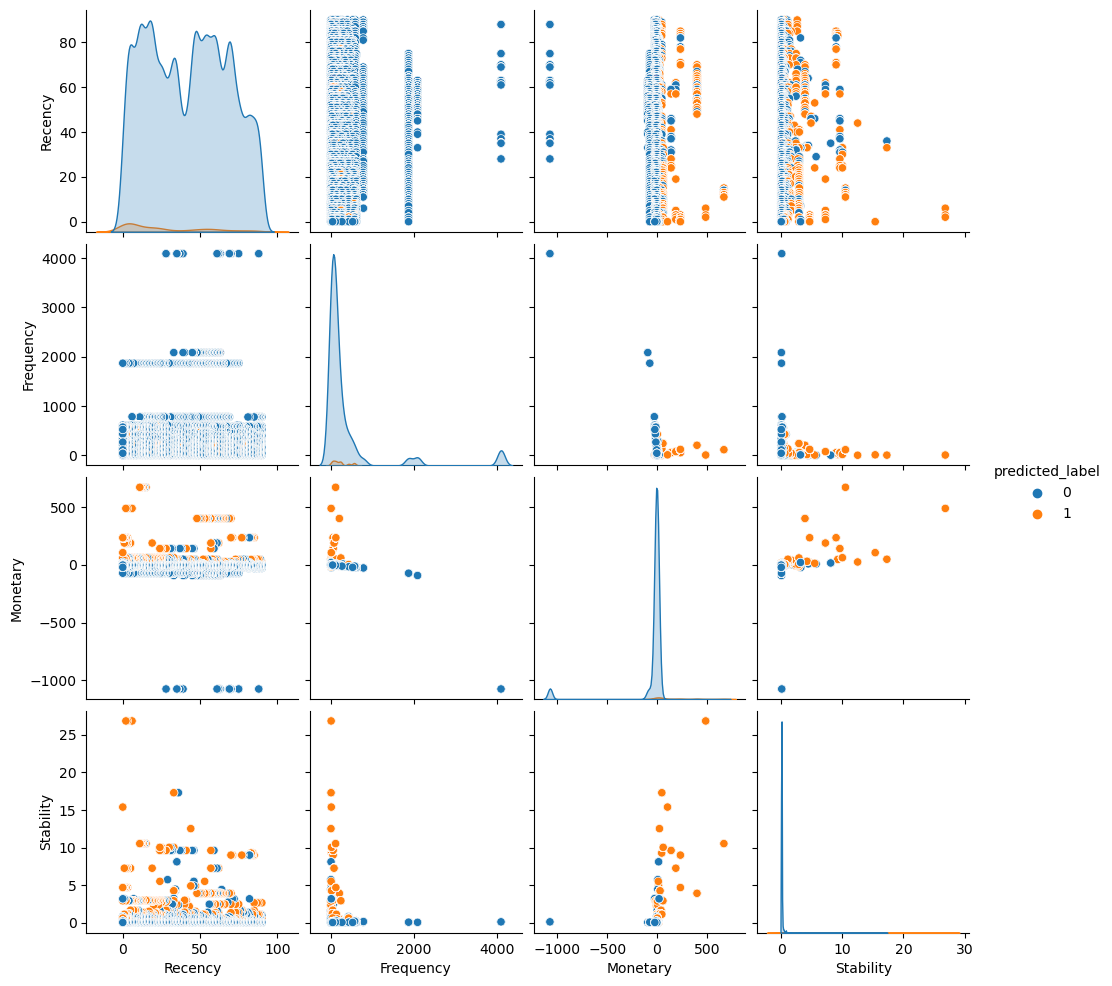

In [18]:
print(confusion_matrix(y, df['predicted_label']))
print(classification_report(y, df['predicted_label']))

# Plotting RFMS space visualization
sns.pairplot(df, vars=rfms_features, hue='predicted_label')
plt.show()

In [19]:
df.to_csv('C:/Users/Abdilfatah/Desktop/Data/week6/model-data.csv', index=False)